<a href="https://colab.research.google.com/github/anupsinghaniya/anupsinghaniya/blob/main/Stock%20Price%20Python%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of Stock Prices by using Regression Analysis with Graphs/Figures and Reports

In [23]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
#List of 50 NSE Stocks
stocks = pd.read_csv('/content/Stock Prices.csv')
stocks.head(10)

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
1,ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10
5,BAJFINANCE,"7,021.00","7,047.90","6,775.00","6,780.00",-345.80,-4.85,16.89,"1,161.63","8,050.00","4,362.00",44.57,-13.69
6,BHARTIARTL,763,763,733.1,735.85,-29.30,-3.83,111.43,830.06,781.8,454.11,58.55,5.70
7,BPCL,397.15,397.2,375,377.4,-22.70,-5.67,100.23,383.54,503,357,-1.22,-12.45
8,BRITANNIA,"3,560.00","3,635.10","3,533.95","3,566.60",-6.80,-0.19,3.73,133.23,"4,153.00","3,317.30",0.30,-3.42
9,CIPLA,892,976.05,890.65,965,65.05,7.23,144.59,"1,380.90","1,005.00",726.5,31.89,6.34


Checking the size of our dataset.

In [6]:
stocks.shape

(50, 13)

In [22]:
stocks.describe()

,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng,Growth
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,2985.739000,3017.261000,2914.208000,2939.569000,-70.133000,-2.930200,71.266600,569.706800,3440.588000,2208.556800,41.203000,-5.996800,1232.03120
std,5024.412163,5057.739037,4911.417131,4943.921262,163.203678,2.677007,93.462062,492.383108,5813.045344,3962.991087,37.358646,6.322546,2092.39606
min,125.600000,125.600000,120.500000,121.150000,-770.500000,-7.480000,0.300000,76.940000,141.500000,77.050000,-16.020000,-22.080000,57.50000
25%,673.000000,678.425000,662.112500,663.187500,-66.775000,-4.527500,13.472500,195.897500,777.825000,391.837500,9.375000,-9.665000,328.64250
50%,1155.950000,1156.750000,1105.750000,1121.250000,-29.975000,-3.300000,30.750000,463.430000,1456.125000,819.775000,35.860000,-5.705000,540.00000
75%,2760.262500,2789.425000,2668.537500,2690.450000,-7.812500,-1.932500,99.200000,744.502500,3388.000000,2272.600000,65.942500,-2.222500,1106.16250
max,26450.000000,26539.900000,25812.000000,25900.000000,158.400000,7.230000,517.880000,2430.360000,32048.000000,22531.000000,167.950000,6.360000,11051.30000


We will change datatype from object to numeric for all columns except symbol.

In [8]:
for i in stocks.select_dtypes(include = 'object').columns[1:]:
    stocks[i] = stocks[i].str.replace(",","")
    stocks[i] = stocks[i].astype(float)

Checking for the info of the following set.

In [9]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     float64
 2   High             50 non-null     float64
 3   Low              50 non-null     float64
 4   LTP              50 non-null     float64
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     float64
 9   52w H            50 non-null     float64
 10  52w L            50 non-null     float64
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(12), object(1)
memory usage: 5.2+ KB


Checking for any null values.

In [10]:
stocks.isnull().sum()

Symbol             0
Open               0
High               0
Low                0
LTP                0
Chng               0
% Chng             0
Volume (lacs)      0
Turnover (crs.)    0
52w H              0
52w L              0
365 d % chng       0
30 d % chng        0
dtype: int64

Counting total number of stocks

In [11]:
stocks['Symbol'].value_counts().sum()

50

Pairplot for the for the following dataset

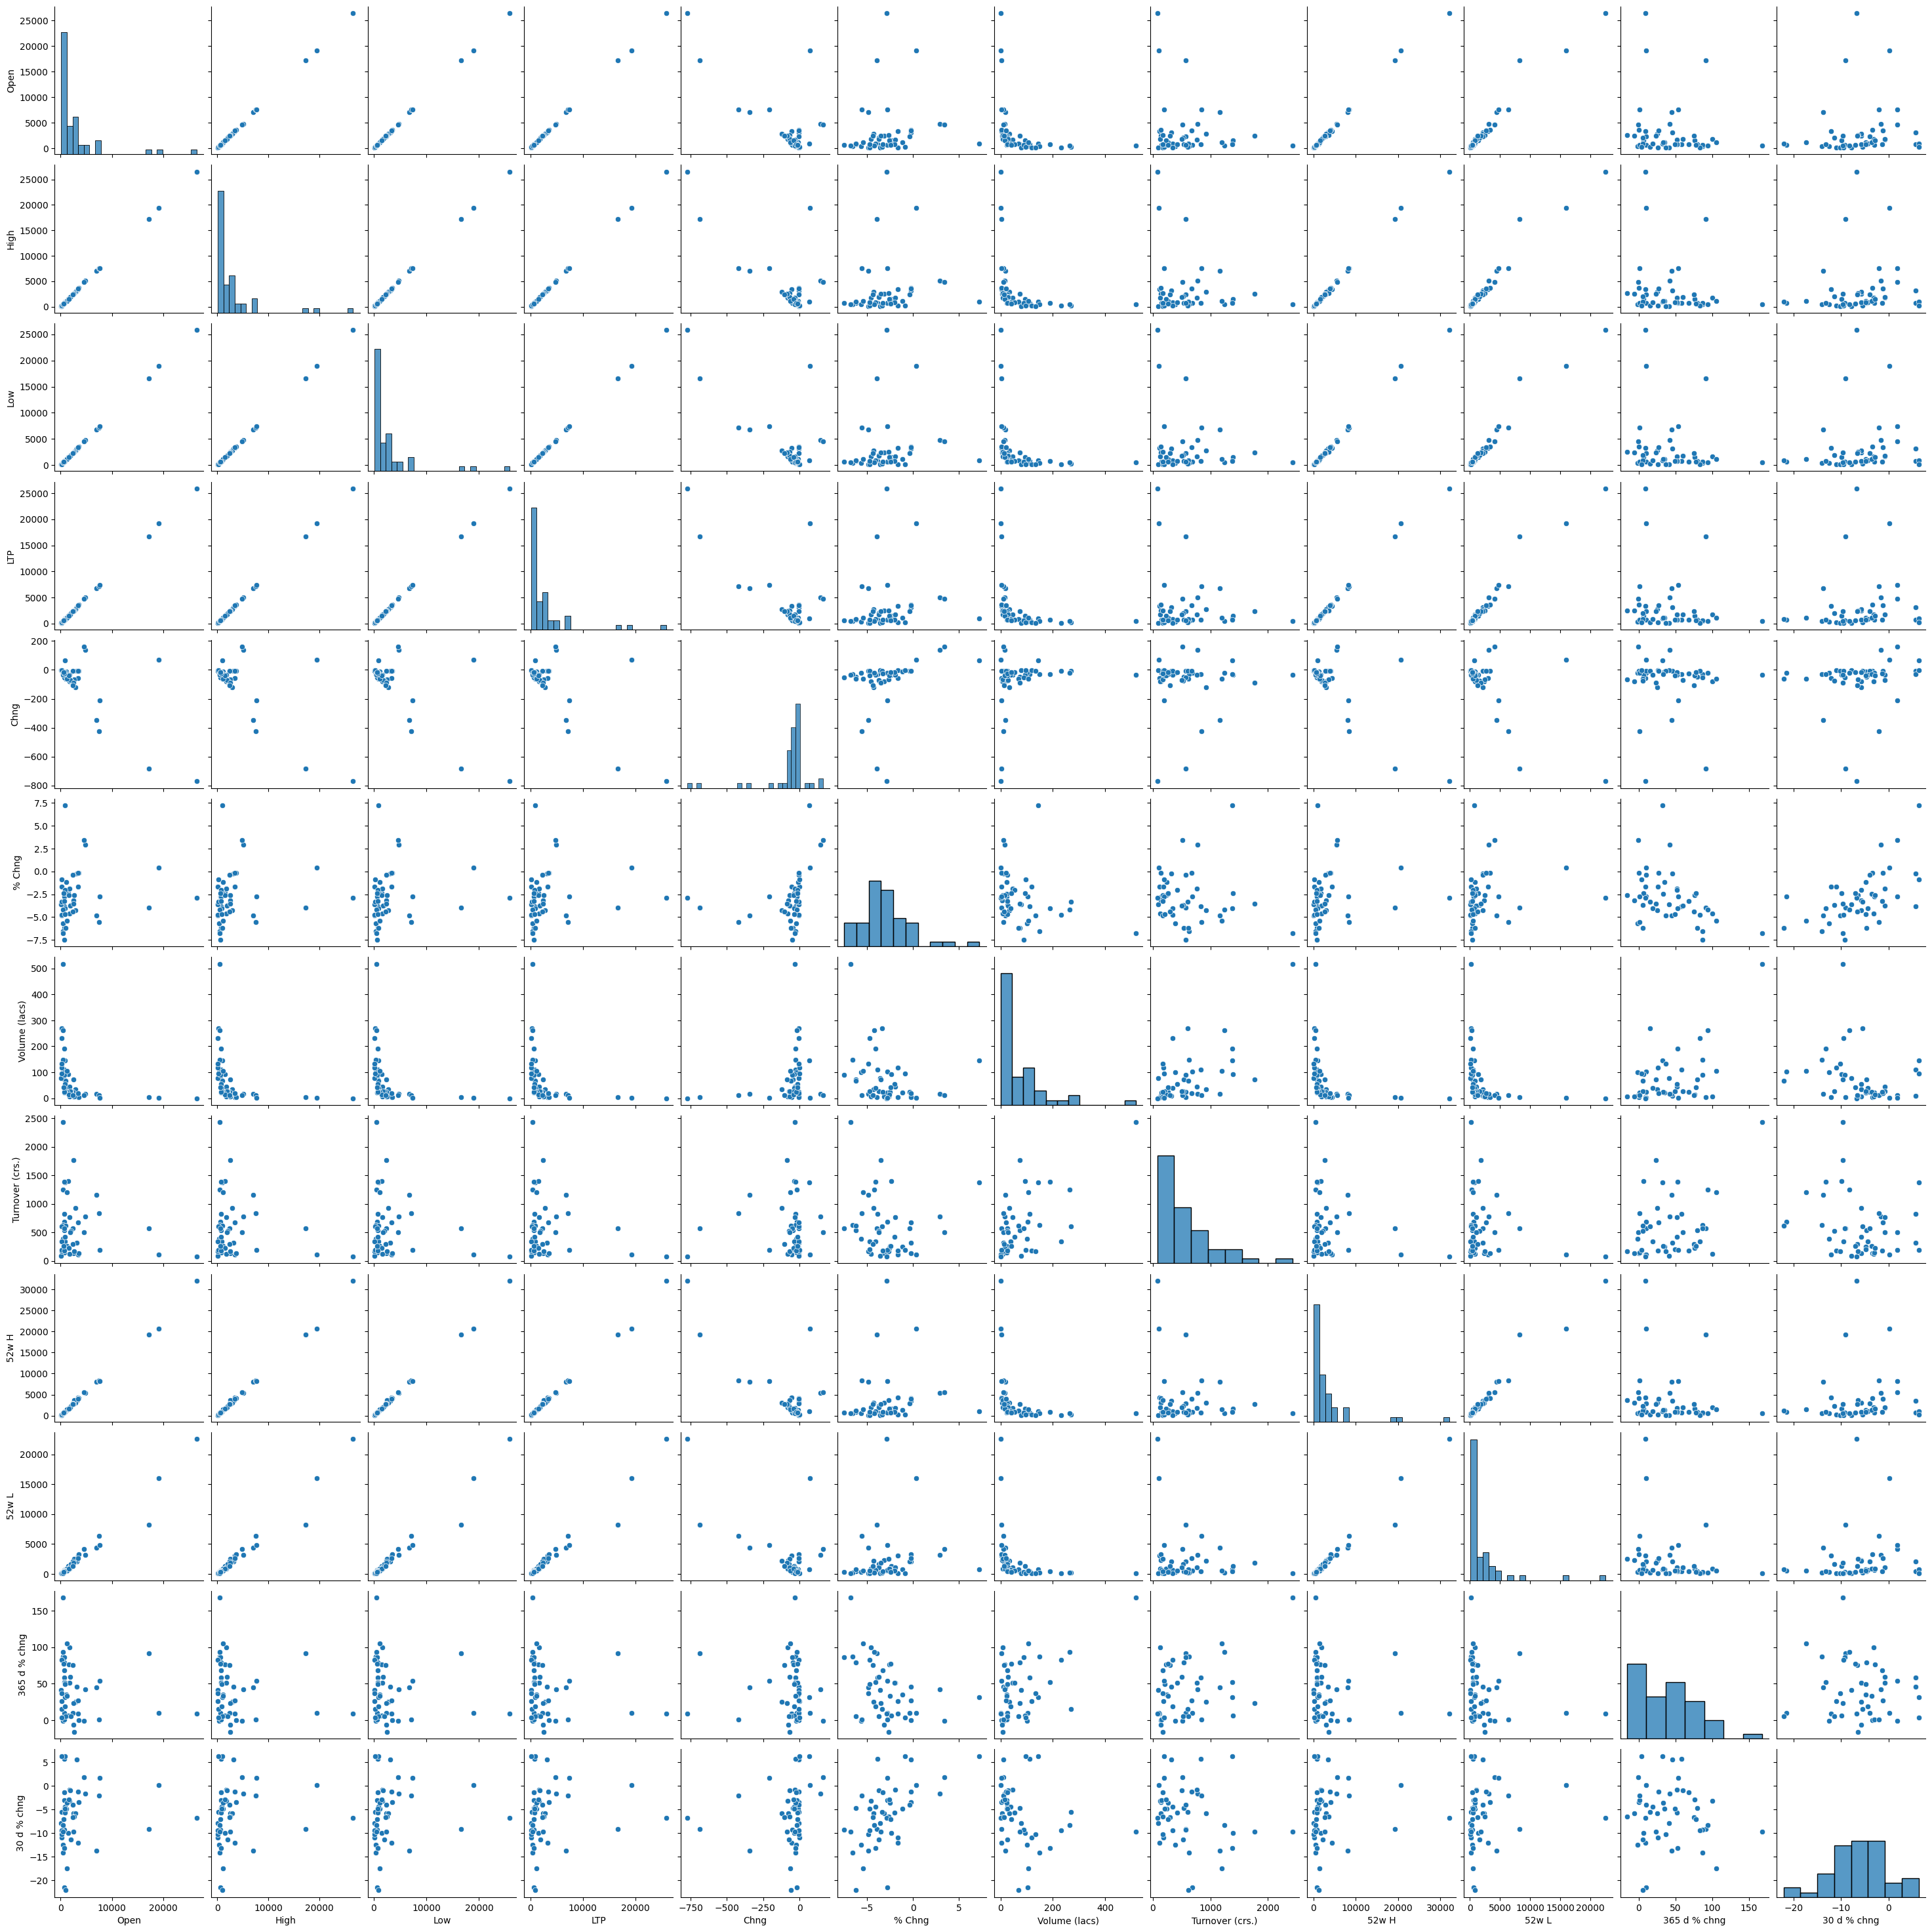

In [12]:
sns.pairplot(stocks)

Finding Top 10 Companies by Values

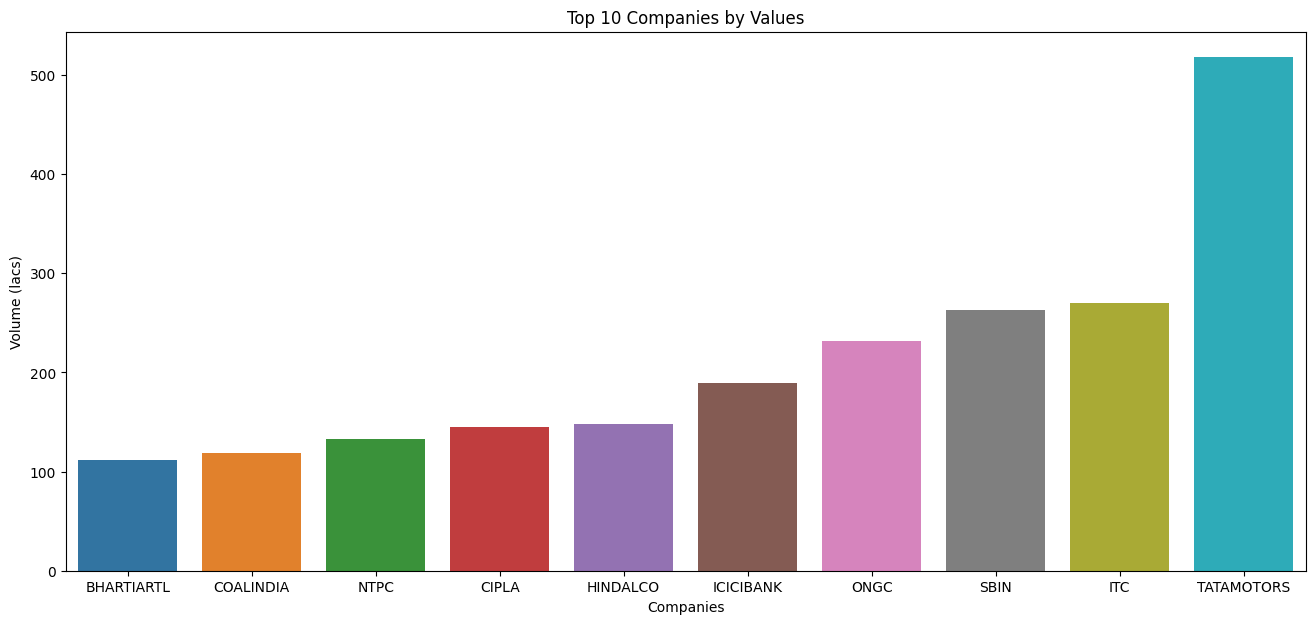

In [13]:
plt.figure(figsize = (16,7))


sns.barplot(data = stocks.sort_values(by = ['Volume (lacs)'], ascending = True).tail(10), x = 'Symbol', y = 'Volume (lacs)')
plt.xlabel("Companies")
plt.title("Top 10 Companies by Values")
plt.show()

Comparison the volumes of companies

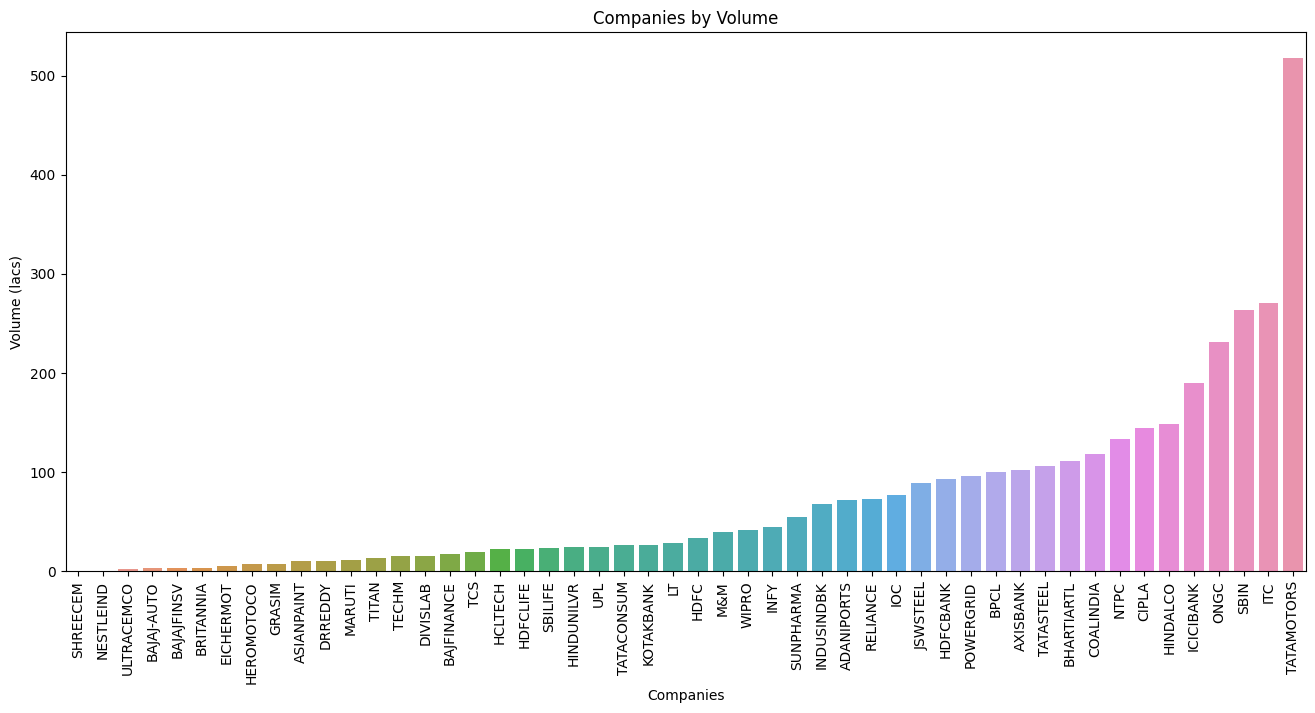

In [14]:
plt.figure(figsize = (16,7))
plt.xticks(rotation = 90)


sns.barplot(data = stocks.sort_values(by = ['Volume (lacs)'], ascending = True), x = 'Symbol', y = 'Volume (lacs)')
plt.xlabel("Companies")
plt.title("Companies by Volume")
plt.show()

Comparision of companies by Turnover

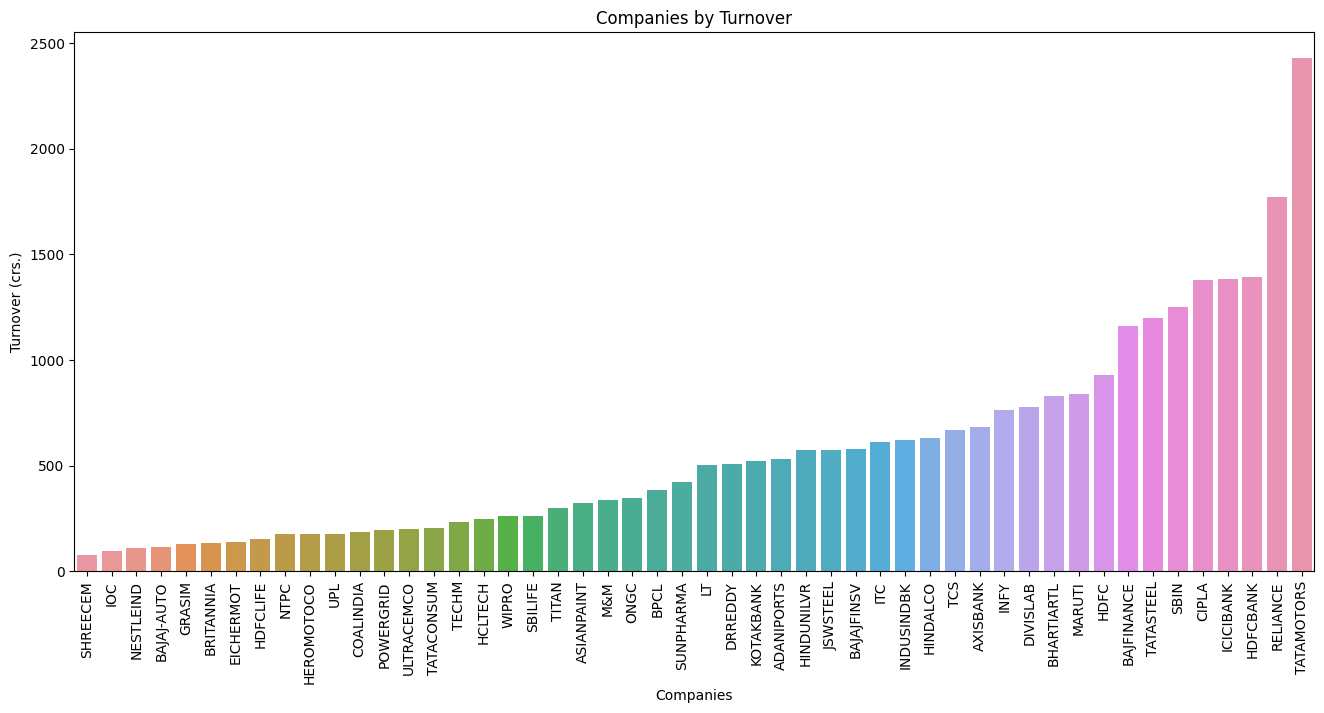

In [15]:
plt.figure(figsize=(16, 7))
plt.xticks(rotation=90)

# Sort the DataFrame by 'Turnover (crs.)' in ascending order
stocks_sorted = stocks.sort_values(by=['Turnover (crs.)'], ascending=True)

# Create a bar plot using Seaborn
sns.barplot(data=stocks_sorted, x='Symbol', y='Turnover (crs.)')
plt.xlabel("Companies")
plt.title("Companies by Turnover")
plt.show()


Companies by total change percentage

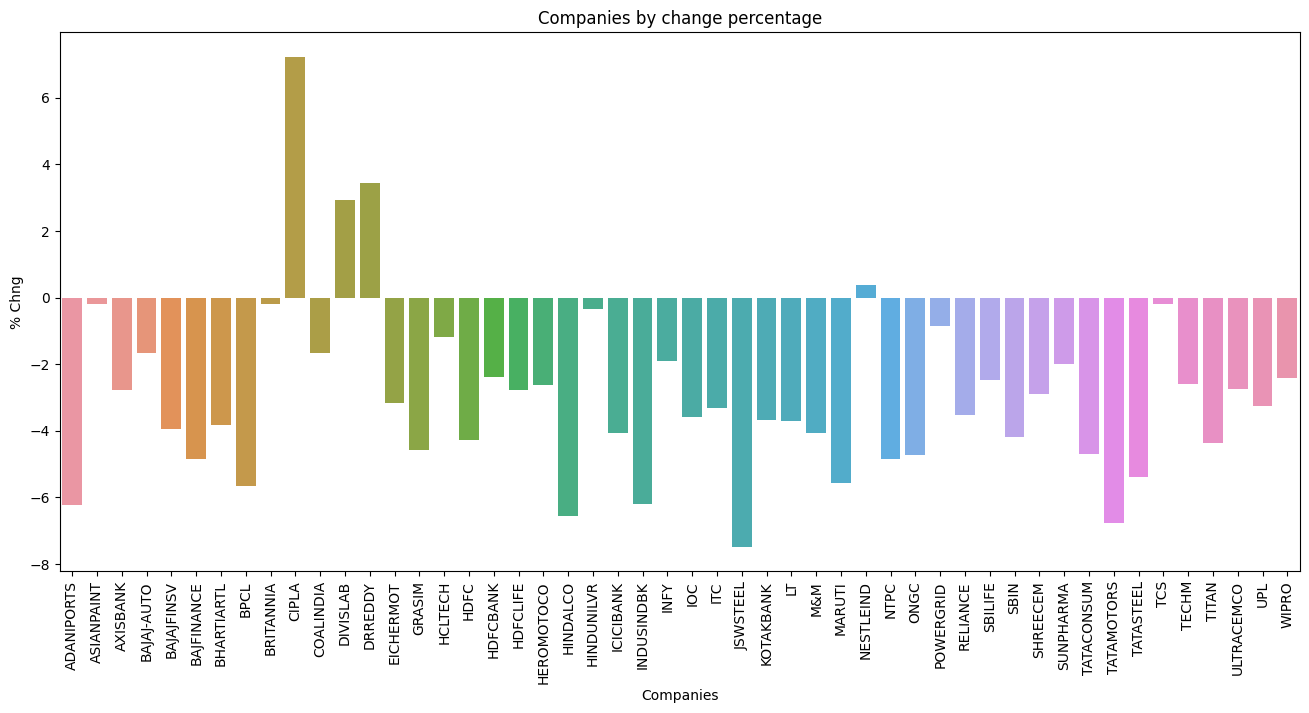

In [16]:
plt.figure(figsize = (16,7))
plt.xticks(rotation = 90)

sns.barplot(data = stocks, x = 'Symbol', y = '% Chng')
plt.xlabel("Companies")
plt.title("Companies by change percentage")
plt.show()

Companies Volume-wise Turnover

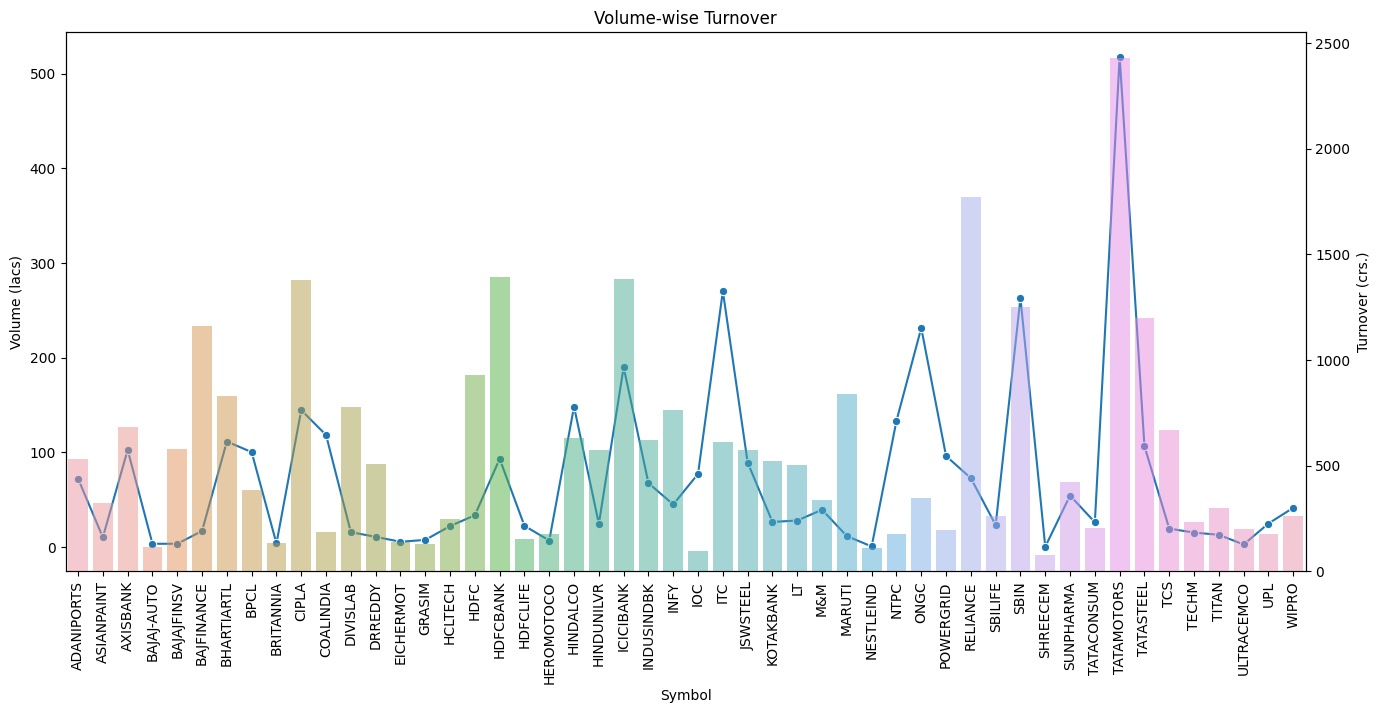

In [17]:
fig, ax1 = plt.subplots(figsize=(16,7))
plt.xticks(rotation = 90)
sns.lineplot(data = stocks, x = 'Symbol', y = 'Volume (lacs)', marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data = stocks, x = 'Symbol', y = 'Turnover (crs.)', alpha=0.5, ax=ax2)
plt.xlabel('Companies')
plt.title('Volume-wise Turnover')
plt.show()

Yearly growth of Stocks

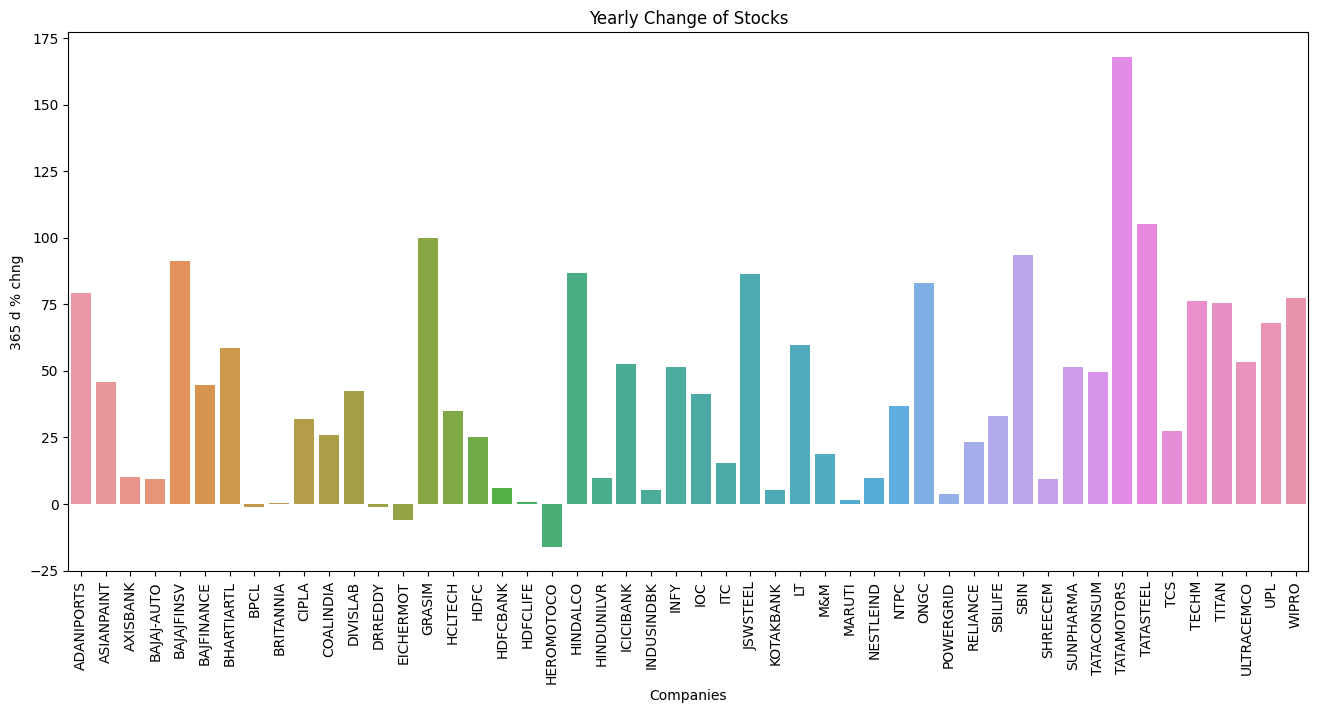

In [18]:

plt.figure(figsize = (16,7))
plt.xticks(rotation = 90)

sns.barplot(data = stocks, x = 'Symbol', y = '365 d % chng')
plt.xlabel("Companies")
plt.title("Yearly Change of Stocks")
plt.show()

Monthly Growth of Companies

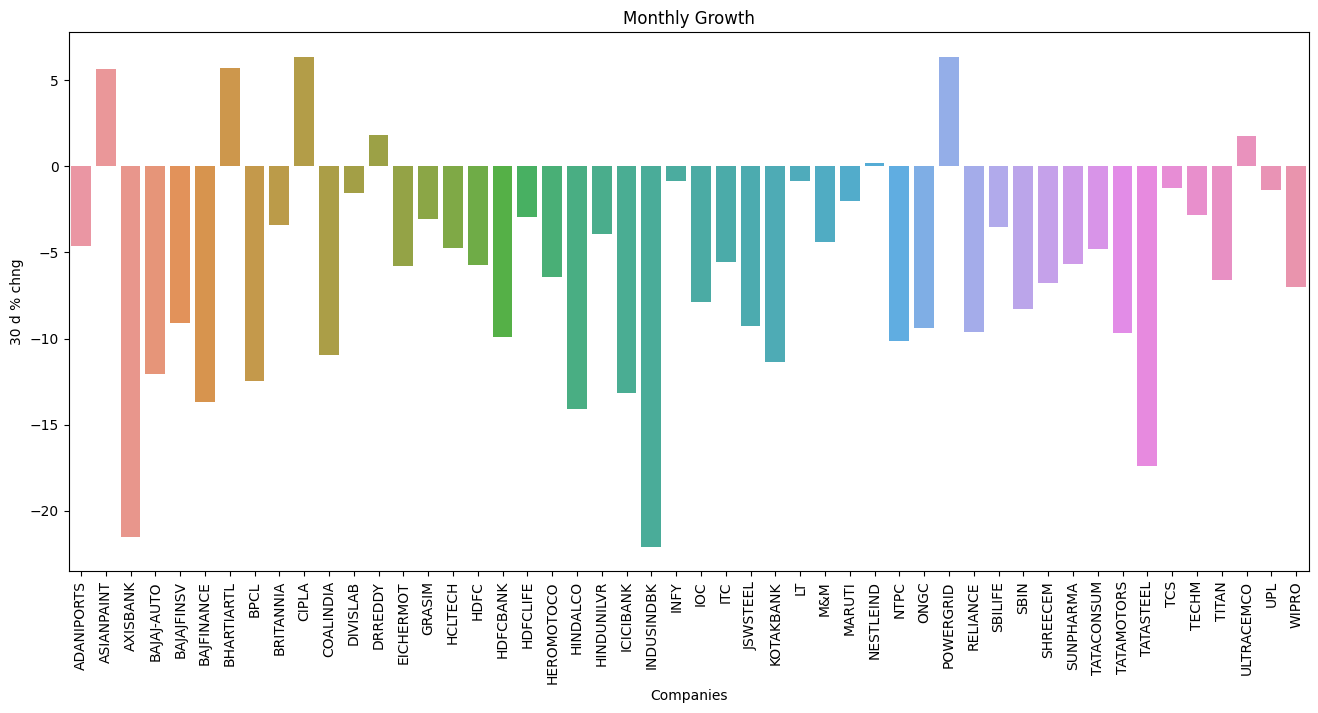

In [19]:
plt.figure(figsize = (16,7))
plt.xticks(rotation = 90)

sns.barplot(data = stocks, x = 'Symbol', y = '30 d % chng')
plt.xlabel("Companies")
plt.title("Monthly Growth")
plt.show()

We will check the difference betwee 52 weaks High and Low of Comapnies

In [20]:
stocks['Growth'] = stocks['52w H'] - stocks['52w L']

Top 10 highest Grow Companies

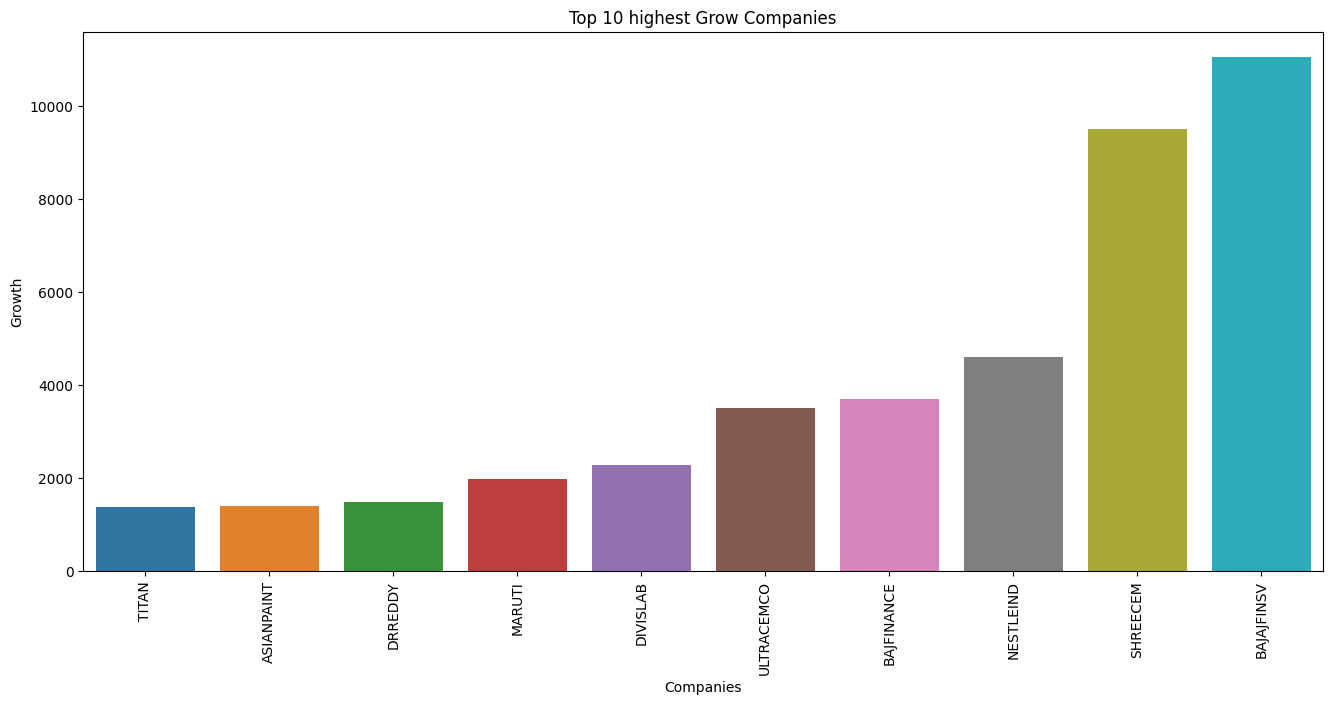

In [21]:
plt.figure(figsize = (16,7))
plt.xticks(rotation = 90)

sns.barplot(data = stocks.sort_values(by = ['Growth'],ascending = True).tail(10), x = 'Symbol', y = 'Growth')
plt.xlabel('Companies')
plt.title("Top 10 highest Grow Companies")
plt.show()



---



**Thank You !!**






